# Creating Loss Graphs for Experiments

This notebook creates a loss graph of a specified experiment and saves the graph in the experiment directory

In [2]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
# function to read the loss record
def read_dict_file(filename):
    with open(filename, 'r') as file:
        # Read each line and convert it to a dictionary using eval
        list_of_dicts = [eval(line.strip()) for line in file]
    df = pd.DataFrame.from_dict(list_of_dicts)
    return df

In [4]:
# use this cell to specify the crop scale and experiment name for visualization

crop = 256
experiment_name = f'detr_output_{crop}_binary_skip'

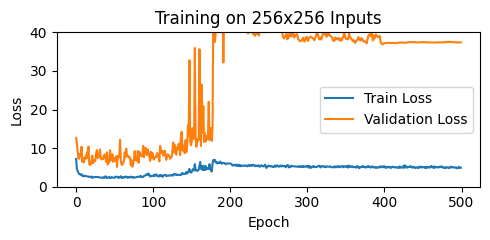

In [7]:
# generating and saving the loss graph

savedir = os.path.join('/workspace', experiment_name)
filename = os.path.join('/workspace', experiment_name, 'log.txt')
df = read_dict_file(filename)

plt.figure(figsize=(5, 2.5))
plt.plot(df['epoch'], df['train_loss'], label='Train Loss', marker='')
plt.plot(df['epoch'], df['test_loss'], label='Validation Loss', marker='')

plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.ylim(0,40)

plt.title(f'Training on {crop}x{crop} Inputs')
plt.legend()
plt.tight_layout()

plt.savefig(os.path.join(savedir, f'{crop}_training_graph.png'))

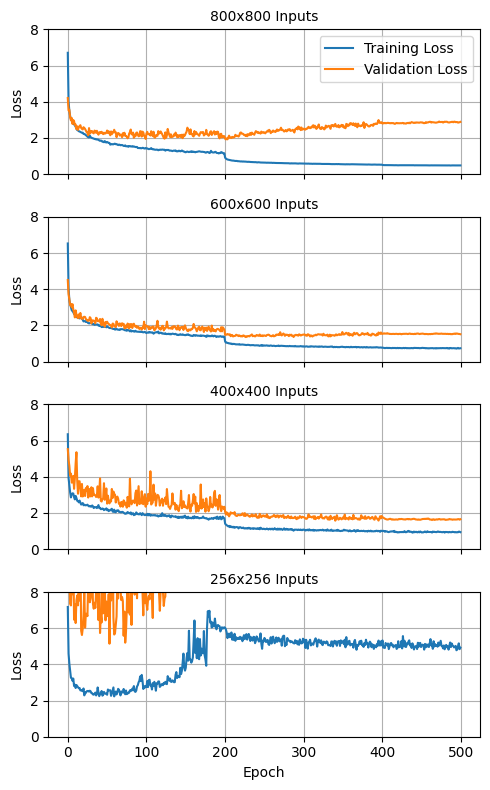

In [12]:


crop_sizes = [800, 600, 400, 256]  # list of crop sizes corresponding to experiments

fig, axes = plt.subplots(4, 1, figsize=(5, 8), sharex=True, sharey=True)
axes = axes.flatten()

for i, crop in enumerate(crop_sizes):
    experiment_name = f'detr_output_{crop}_binary_skip_ep500'
    savedir = os.path.join('/workspace', experiment_name)
    filename = os.path.join(savedir, 'log.txt')
    df = read_dict_file(filename)

    ax = axes[i]
    ax.plot(df['epoch'], df['train_loss'], label='Training Loss', marker='')
    ax.plot(df['epoch'], df['test_loss'], label='Validation Loss', marker='')

    ax.set_ylim(0, 8)
    ax.set_title(f'{crop}x{crop} Inputs', fontsize=10)
    ax.grid(True)
    if i == 0:
        ax.legend()


axes[0].set_ylabel('Loss')
axes[1].set_ylabel('Loss')
axes[2].set_ylabel('Loss')
axes[3].set_ylabel('Loss')

axes[3].set_xlabel('Epoch')


plt.tight_layout()
plt.savefig('/workspace/visualizations/training_graphs_ep500.png')
plt.show()